# Lyft Bike Rides Data Exploratory and Visualization
## by Tien Duong

The purpose of this project is explore, analyze and visualize user's behaviors by using the `lyfy_bike_data.csv` of the month July to August 2020. This project is part of the Udacity's Data analysis program. The Dataset contain 13 columns and 154967 rows that extracted from the lyft webpage under bay-wheel >https://www.lyft.com/bikes/bay-wheels/system-data<. The dataset consist of `longtitude` and `latitude` coordinates. Ride_type and ID under `ride_id` and `ride_type`. Start_station_name and ID under `start_station_name` and `start_station_name_id`. End_station_name and ID under `end_station_name` and `end_station_name_id`. Membership type under `member_casual`.

In [5]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import folium
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
# Reading in the dataset into pandas
df = pd.read_csv('lyfy_bike_data.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             154967 non-null  object 
 1   rideable_type       154967 non-null  object 
 2   started_at          154967 non-null  object 
 3   ended_at            154967 non-null  object 
 4   start_station_name  102589 non-null  object 
 5   start_station_id    102589 non-null  float64
 6   end_station_name    100407 non-null  object 
 7   end_station_id      100407 non-null  float64
 8   start_lat           154967 non-null  float64
 9   start_lng           154967 non-null  float64
 10  end_lat             154771 non-null  float64
 11  end_lng             154771 non-null  float64
 12  member_casual       154967 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.4+ MB


## Preliminary Wrangling
- Converting `start_time` and `end_time` to datetime
- Calculate duration per ride
- Transforming day of week and date of the month into a column
- Handling tidiness and cleanliness of data

#### 1. Converting to date-time

In [8]:
# Converting star and end time to timestamp
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [9]:
df.started_at.sort_values().head()

57746    2020-07-01 00:00:15
25730    2020-07-01 00:01:40
64752    2020-07-01 00:01:51
122427   2020-07-01 00:02:32
18342    2020-07-01 00:02:44
Name: started_at, dtype: datetime64[ns]

##### 2. Calculate duration 

In [10]:
df['time_duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')

##### 3. Creating day of the week and month for start and end 

In [11]:
df['start_date_of_month'] = df['started_at'].dt.day
df['start_day_of_week'] = df['started_at'].dt.dayofweek
df['start_month'] = df['started_at'].dt.month

In [12]:
df['end_date_of_month'] = df['ended_at'].dt.day
df['end_day_of_week'] = df['ended_at'].dt.dayofweek
df['end_month'] = df['ended_at'].dt.month

In [13]:
dates= {0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',
       5:'Friday', 6:'Saturday'}
df['start_day_of_week'] = df['start_day_of_week'].map(dates)
df['end_day_of_week'] = df['end_day_of_week'].map(dates)

##### 4. Handling tidiness and cleanliness of the data

In [14]:
# extract the columns that we'll be using for this project
delete = ['ride_id', 'start_station_id', 'end_station_id', 'end_station_name', 'end_lat', 'end_lng']
df.drop(delete, axis=1, inplace=True)

In [15]:
# Extracting the time more realistic time duration
df = df.loc[(df['time_duration']> 0) &(df['time_duration'] < 500)]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150752 entries, 0 to 154966
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   rideable_type        150752 non-null  object        
 1   started_at           150752 non-null  datetime64[ns]
 2   ended_at             150752 non-null  datetime64[ns]
 3   start_station_name   100208 non-null  object        
 4   start_lat            150752 non-null  float64       
 5   start_lng            150752 non-null  float64       
 6   member_casual        150752 non-null  object        
 7   time_duration        150752 non-null  float64       
 8   start_date_of_month  150752 non-null  int64         
 9   start_day_of_week    150752 non-null  object        
 10  start_month          150752 non-null  int64         
 11  end_date_of_month    150752 non-null  int64         
 12  end_day_of_week      150752 non-null  object        
 13  end_month     

In [17]:
print(df.describe())

           start_lat      start_lng  time_duration  start_date_of_month  \
count  150752.000000  150752.000000  150752.000000        150752.000000   
mean       37.732847    -122.357940      19.126930            15.817999   
std         0.137837       0.167041      23.425124             8.877277   
min        37.240000    -122.510000       1.000000             1.000000   
25%        37.760000    -122.433274       7.000000             8.000000   
50%        37.774017    -122.413256      13.000000            16.000000   
75%        37.788299    -122.392031      22.000000            24.000000   
max        37.880222    -121.770000     495.000000            31.000000   

       start_month  end_date_of_month      end_month  
count     150752.0      150752.000000  150752.000000  
mean           7.0          15.817807       7.000106  
std            0.0           8.877032       0.010302  
min            7.0           1.000000       7.000000  
25%            7.0           8.000000       7.000

In [18]:
# Make another file so we dont overwrite the original
df.to_csv('new_df.csv')

### What is the structure of your dataset?
There are totals of 154967 rides occur with 14 columns features

`(Start Time and Date
End Time and Date
Start Station Name
Start Station Latitude
Start Station Longitude
End Station Name
End Station Latitude
End Station Longitude
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual))`


### What is/are the main feature(s) of interest in your dataset?
My interest from this dataset is to understand the user's behavior from the bay wheel rides, which day of the week most popular for lyfts rides, and time duration of rides and places with the most rides.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features that I'll be using from this dataset are `started_at` and `ended_at` to extract our the dates of the week, dates in the month. I will also using these two feature to calculate for duration time per ride. Next, there are station names, so that will give me the name of the station with most bike start out and end with. There's a column of member type, so this will give me type of members using the rides. And lastly, it will be the longtitude and latitude where I will be performing some plotting using the coordinates.

## Univariate Exploration
For this section of exploration, I'll be exploring the features variable that relate to answer the stations  most started out with most bikes. And then i'll be looking into the secondary question which day of the week have most duration and user type.

1. Total member and non-member
2. Find station with longest duration
3. Type of bikes use for member and non-member use
4. Rides use in day of the week
5. Relationship between user types and average duration
6. Location of lyft bike location on map

In [19]:
# Reading the new data file
df = pd.read_csv('new_df.csv')

##### Stations start out with the most bike?

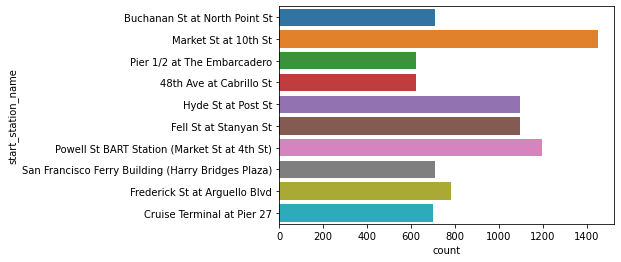

In [20]:
# Creating a filteration dataframe to find out 10 tops station names with the most duration time
most_casual = df.groupby(['start_station_name']).agg('sum')
most_casual = most_casual.sort_values(by='time_duration', ascending=False)
top_casual_duration = most_casual[:10].index.tolist()
top10 = df.loc[df['start_station_name'].isin(top_casual_duration)].dropna()
sb.countplot(data=top10, y='start_station_name');

To check for different type of user references between each type of bikes, we need to check for numbers of total member and non member type of users. 
####  Member and non-member user

In [21]:
# Column indexing on member_casual and using value_count for return of number of with membership and non-membership
most_casual = df['member_casual'].value_counts()
most_casual

casual    90392
member    60360
Name: member_casual, dtype: int64

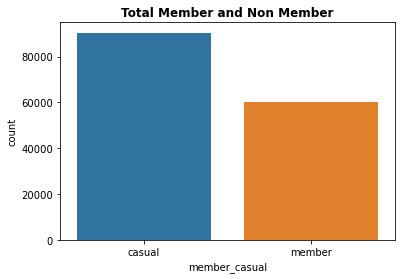

In [22]:
# Bar plot of the total numbers of member and non member
sb.countplot(data=df, x='member_casual');
plt.title('Total Member and Non Member', fontweight='bold');

By using value_count onto the member_casual column, I received the total numbers of member and non membership. There are more people whose are non member operate the bikes throughout the month of July.

#### Time duration distribution 

In [23]:
df.time_duration.describe()

count    150752.000000
mean         19.126930
std          23.425124
min           1.000000
25%           7.000000
50%          13.000000
75%          22.000000
max         495.000000
Name: time_duration, dtype: float64

According to our summary of the time duration column, we have negative numbers as for time duration and certain rides are extremely outlier the rest of the data. The outliers and negative numbers are not realistic, therefore, I'll be filtering out these variables.

In [24]:
# performing log scale transformation on the time duration column
np.log10(df.time_duration.describe())

count    5.178263
mean     1.281645
std      1.369682
min      0.000000
25%      0.845098
50%      1.113943
75%      1.342423
max      2.694605
Name: time_duration, dtype: float64

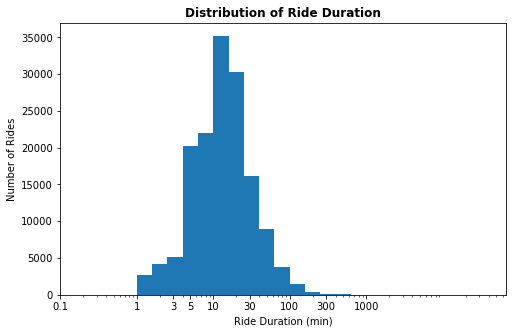

In [25]:
# Transform xscale with log and plotting the time duration 
plt.figure(figsize=[8,5])
bins = 10 ** np.arange(0, 4.57+0.1, 0.2)
ticks = [0.1,1,3,5,10,30,100,300,1000]
labels =['{}'.format(v) for v in ticks]
plt.hist(data=df, x='time_duration', bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Ride Duration (min)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Duration', weight = 'bold');

From the distribution,this is a unimodal distribution and slightly skewed. We can see that majority of the ride duration is between 5-30 minutes. We also have a wide spread that some even go beyond 300 minutes, maybe there's hardware problem that need to be solve.

####  Number of rides in day of the week

In [26]:
# Checking the total values in each date of week
df.start_day_of_week.value_counts()

Friday       25218
Thursday     24828
Wednesday    23060
Tuesday      22546
Saturday     21420
Monday       17497
Sunday       16183
Name: start_day_of_week, dtype: int64

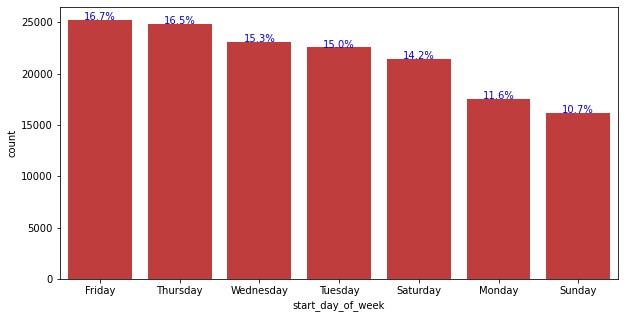

In [27]:
# create the plot
base_color = sb.color_palette()[3]
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'start_day_of_week', color = base_color, order=df['start_day_of_week'].value_counts().index)


# add annotations
n_points = df.shape[0]
cat_counts = df['start_day_of_week'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-7, pct_string, ha = 'center', color = 'b')

Interestingly taken that Friday and Thursday are the two highest day with the most rides frequencies.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration variable require a log transform onto it xscale so that I can make better observation. It's a unimodal distribution with slight skewed, and majority of the ride duration is between 5-30 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I had to filter some of the times under duration columns because it wasn't realistic. These are outliers number that discrupt the distribution and needed to removed.

## Bivariate Exploration
Majority of the variables in this project are categorical, but for safe, I will perform a correlation on the numeric variables before moving onto exploring the categorical variables using bivariate exploration.

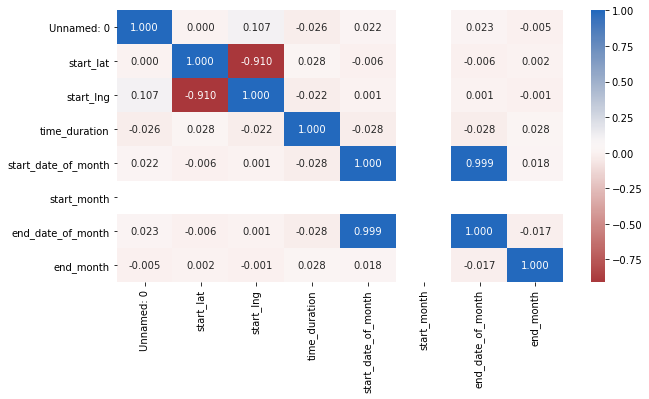

In [28]:
# Checking correlation betweek variables inside the dataset using correlation and heatmap.
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot= True, fmt='.3f', cmap='vlag_r');

There isn't much insight for the correlation of numeric variables. I will move onto the using bivariate exploration on the categorical. Frist I will compare the types of bike and membership status.

In [29]:
#Using groupby to combines the variable column and reset index to normal indexing
bike_type = df.groupby(['member_casual', 'rideable_type']).size()
bike_type = bike_type.reset_index(name='count')
bike_type

,member_casual,rideable_type,count
0,casual,docked_bike,24673
1,casual,electric_bike,65719
2,member,docked_bike,22743
3,member,electric_bike,37617


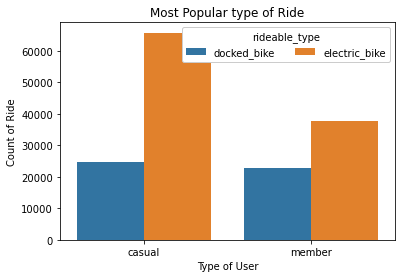

In [30]:
# Bar plot of type of bike for each type of user references
ax = sb.barplot(data =bike_type, x = 'member_casual', y='count',hue = 'rideable_type' )
ax.legend(loc='best', ncol=3, framealpha=1, title='rideable_type');
ax.set(xlabel='Type of User', ylabel='Count of Ride', title='Most Popular type of Ride');

For the relationship between type of bikes and membership status. Both member and non member prefer electric bikes over docked bike. For the docked bike type both member and non member share the same rides frequencies.

#### Type of rides by weekday

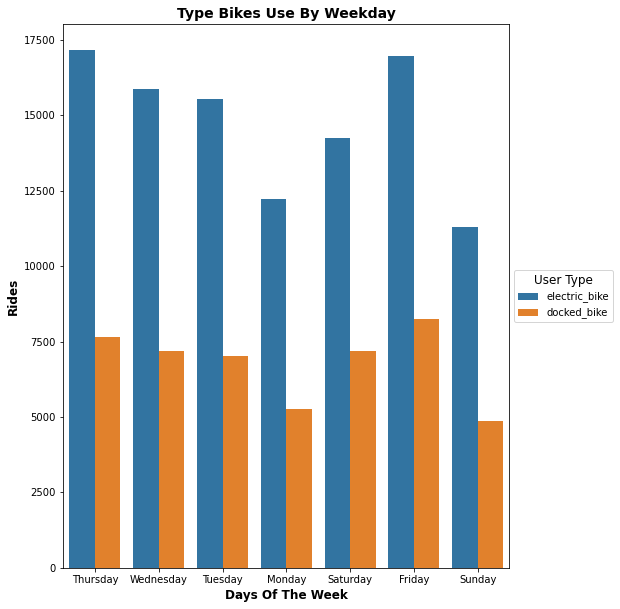

In [31]:
# plotting countplot of the types of bike use most throughout days of the week
plt.figure(figsize=[8,10])

sb.countplot(data = df, x='start_day_of_week', hue = 'rideable_type');

plt.title("Type bikes use by weekday".title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Days of the Week'.title(),
               fontsize = 12, weight = "bold")

plt.ylabel('Rides'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

For the relationship of days of the week and bike types, we have Thursday and Friday with the most favorite electric bike rides. Friday also have the most docked bike rides but it's much under performance than the user's favorit electric bike. Next, I want to see the relationship between membership types and days of the week.

#### Day of the week duration by type of user

/Users/mac/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


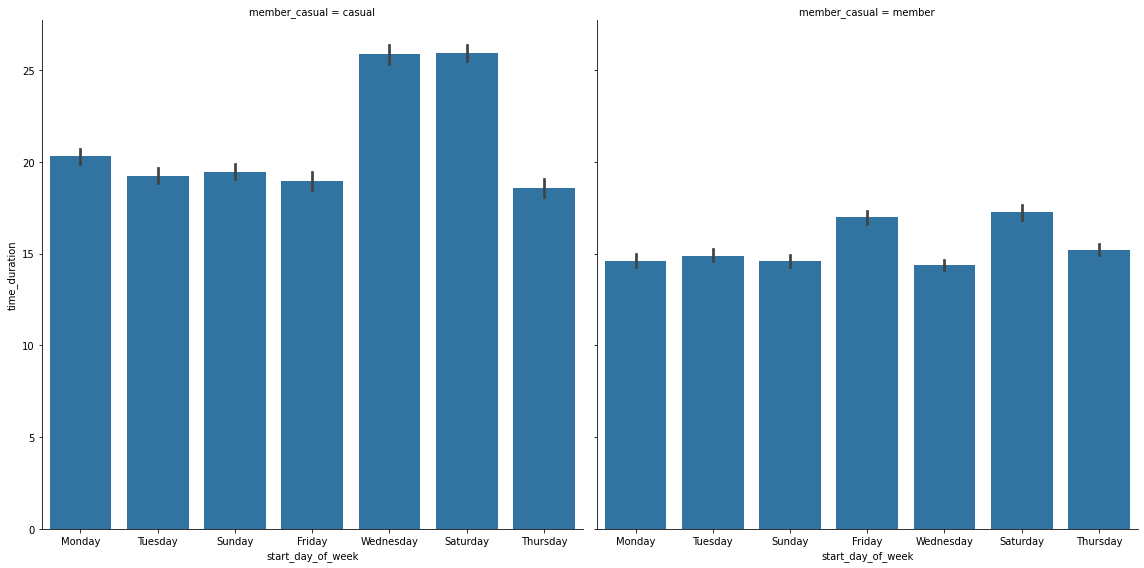

In [32]:
# using bar plot to graph the the relation ship between 3 variables
g = sb.FacetGrid(data=df, col='member_casual',height=8)
g.map(sb.barplot, 'start_day_of_week', 'time_duration');


For the relationship between membership types and days of the week, we have most Saturday and Thursday are the most activate day of the week for non member type. The rest of the frequecies of the other day of the week nearly all same.

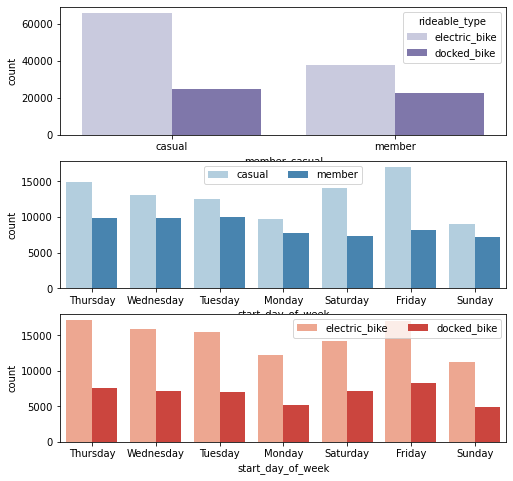

In [33]:
# Quick summary by plotting the relationship between 3 categorical types from the dataset
plt.figure(figsize = [8, 8])

plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_casual', hue = 'rideable_type', palette = 'Purples')

ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day_of_week', hue = 'member_casual', palette = 'Blues')
ax.legend(ncol = 2)

ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day_of_week', hue = 'rideable_type', palette = 'Reds')
ax.legend(loc = 1, ncol = 2) 

plt.show()

In the finalize plot of the bivariate exploration, the important insight are most people prefer using the electric bikes over docked bike, Friday is the most active day bike ride. And Friday also have the most people with membership go for bike rides.

## Multivariate Exploration

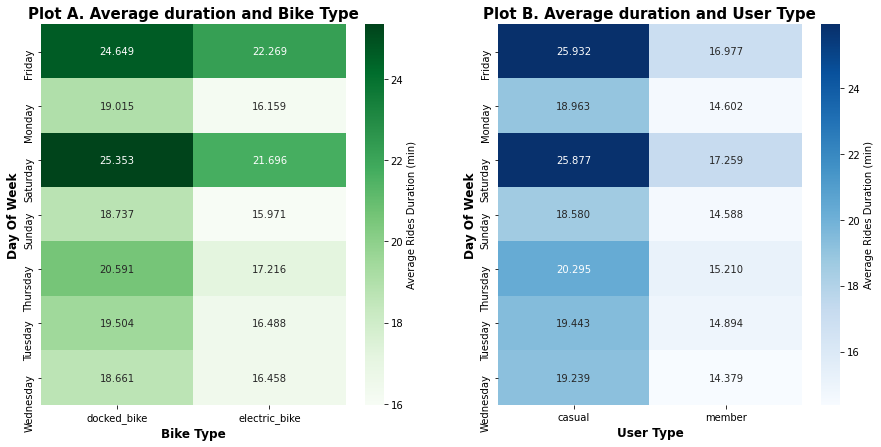

In [34]:
#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
plt.figure(figsize=[15,7])
c_ = df.groupby(['member_casual','start_day_of_week']).mean()['time_duration']
c_ = c_.reset_index(name = 'average_duration')
c_ = c_.pivot(index = 'start_day_of_week', columns = 'member_casual', 
                            values = 'average_duration')

b_ = df.groupby(['rideable_type','start_day_of_week']).mean()['time_duration']
b_ = b_.reset_index(name = 'average_duration')
b_ = b_.pivot(index = 'start_day_of_week', columns = 'rideable_type', 
                            values = 'average_duration')
plt.subplot(1,2,2)
sb.heatmap(c_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Blues')

plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Day of week'.title(),
               fontsize = 12, weight = "bold");
plt.title('Plot B. Average duration and User Type', weight='bold', fontsize=15)

plt.subplot(1,2,1)
sb.heatmap(b_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Greens')
plt.xlabel('Bike Type'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Day of week'.title(),
               fontsize = 12, weight = "bold");
plt.title('Plot A. Average duration and Bike Type', weight='bold',fontsize=15);

For our mulivariate plot. In plot A, I plot the relationship of day of the week with bike type and average duration of ride, and Plot B, I plot the relationship of day of week with user type and average duration of ride. 

# Graphing the location of each bikes using longtitude and latitude
This part of the project is to plot the given longtitude and latitude using Folium.  


In [51]:
df = pd.read_csv('lyfy_bike_data.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


In [48]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [52]:
# create map and display it
world_map = folium.Map()


sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco

In [64]:
incidents = folium.map.FeatureGroup()

# loop through the 100 bikes and add each bike type to feature group
for lat, lng, in zip(df.start_lat[:100], df.start_lng[:100]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(df.start_lat[:100])
longitudes = list(df.start_lng[:100])
labels = list(df.rideable_type[:100])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)      
    
# add features to map
sanfran_map.add_child(incidents)

## Conclusion
In our result concluding the analysis, we was able to observe the different type of user behaviors between member and non member on different day of the week. Majority of the rides operate on Friday and Saturday by non-member and the electric bike is customer favorite bike type. 
For the coordinates given dataset, the most density of coordinates are locate within the City areas of San Francisco, Oakland, and San Jose. 

The insight of this dataset give us the advantage of user's behavior that can help make business decision that bases on data driven methodologies. These improvement method however can continue to be more efficient overtime as we continue to reinforce our method by collecting more data from the user's behaviors.